<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Automatic-Differentiation" data-toc-modified-id="Automatic-Differentiation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Automatic Differentiation</a></span><ul class="toc-item"><li><span><a href="#Fundamental" data-toc-modified-id="Fundamental-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Fundamental</a></span></li><li><span><a href="#MXNet-AutoGrad" data-toc-modified-id="MXNet-AutoGrad-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>MXNet AutoGrad</a></span></li><li><span><a href="#Quiz" data-toc-modified-id="Quiz-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Quiz</a></span></li></ul></li><li><span><a href="#Optimizers" data-toc-modified-id="Optimizers-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Optimizers</a></span><ul class="toc-item"><li><span><a href="#MXNet-Optimizers" data-toc-modified-id="MXNet-Optimizers-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>MXNet Optimizers</a></span></li><li><span><a href="#Gluon-Trainers" data-toc-modified-id="Gluon-Trainers-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Gluon Trainers</a></span></li><li><span><a href="#Quiz" data-toc-modified-id="Quiz-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Quiz</a></span></li></ul></li><li><span><a href="#Datasets-&amp;-DataLoaders" data-toc-modified-id="Datasets-&amp;-DataLoaders-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Datasets &amp; DataLoaders</a></span><ul class="toc-item"><li><span><a href="#Data-in-Machine-Learning" data-toc-modified-id="Data-in-Machine-Learning-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Data in Machine Learning</a></span></li><li><span><a href="#Gluon-Datasets" data-toc-modified-id="Gluon-Datasets-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Gluon Datasets</a></span></li><li><span><a href="#Gluon-Transformations" data-toc-modified-id="Gluon-Transformations-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Gluon Transformations</a></span></li><li><span><a href="#Gluon-DataLoaders" data-toc-modified-id="Gluon-DataLoaders-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Gluon DataLoaders</a></span></li><li><span><a href="#Practice-Assignment" data-toc-modified-id="Practice-Assignment-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Practice Assignment</a></span></li></ul></li><li><span><a href="#Neural-Network-Training-&amp;-Evaluation" data-toc-modified-id="Neural-Network-Training-&amp;-Evaluation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Neural Network Training &amp; Evaluation</a></span><ul class="toc-item"><li><span><a href="#Training" data-toc-modified-id="Training-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Training</a></span></li><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Evaluation</a></span></li><li><span><a href="#Practice-Assignment" data-toc-modified-id="Practice-Assignment-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Practice Assignment</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Summary</a></span></li></ul></div>

# Key Concepts
- Construct datasets for your own data
- Use Auto-grad to calculate gradients
- Understand the role of Optimizers
- Write a complete training loop

## Automatic Differentiation

### Fundamental

Neural network training consists of repeating three steps:
1. Forward (Model prediction)
    - Passing data through the model to obtain output
    - Predicted values compared with actual via loss function
    - Objective: minimize loss

<img src="assets/module5/forward-pass.png" width="300">

2. Backward
    - Computing gradient of the loss function with respect to the parameters
    - Gradient is computed recursively using chain rule

<img src="assets/module5/backward-pass.png" width="300">

3. Optimize
    - Use computed gradient to update the model parameters to minimize the loss

Gradient:
- is the derivative of function at a point
- gives the direction of steepest increase of the function
- Gradient descent follows the negative gradient to minimize a function (local minima)

Automatic differentiation: evaluate gradient numerically/computationally rather than analytically. How?
- Record operation and build computation graph
- Repeatedly apply chain rule to compute gradient

Backpropagation: algorithm to train neural networks using automatic differentiation to update parameters. Example:
Defined prediction and loss function as follows:
- $pred = \sigma(Wx+b)$
- $loss = f(pred, y)$

The derivative of loss function with respect to $pred$ and $\sigma$:
- $\nabla_{pred}loss = f'(pred, y)$
- $\nabla_{\sigma}loss = \nabla_{pred} . \sigma'(Wx+b)$

Hence we update the parameter with:
- $\nabla_{W}loss = \nabla_{\sigma}loss . x$
- $\nabla_{b}loss = \nabla_{\sigma}loss$

### MXNet AutoGrad

In [1]:
import mxnet as mx
from mxnet import nd, autograd

In [2]:
x = nd.array([[1, 2], [3, 4]])
x


[[1. 2.]
 [3. 4.]]
<NDArray 2x2 @cpu(0)>

Use `.attach_grad()` to signal that we will compute the gradient of a function with respect to that NDArray. It will allocate space to store the gradient value.

In [3]:
x.attach_grad()

Let's say we want to compute the gradient of $f(x) = 2x^2$

In [4]:
f = lambda x: 2 * x**2
with autograd.record():
    y = f(x)
x, y

(
 [[1. 2.]
  [3. 4.]]
 <NDArray 2x2 @cpu(0)>,
 
 [[ 2.  8.]
  [18. 32.]]
 <NDArray 2x2 @cpu(0)>)

To compute the gradient, use `.backward()` on the function.

In [5]:
y.backward()

The gradient value is stored on `.grad`

In [6]:
x, x.grad

(
 [[1. 2.]
  [3. 4.]]
 <NDArray 2x2 @cpu(0)>,
 
 [[ 4.  8.]
  [12. 16.]]
 <NDArray 2x2 @cpu(0)>)

We can verify the result with $\frac{dy}{dx} = 4x$

In [7]:
x[1]


[3. 4.]
<NDArray 2 @cpu(0)>

Let's define another complex function $g(x)$ where:
- x is random number between -1 and 1
- x is multiplied by 2 until its norm reach 1000
- If the sum of x is positive, then return first element. Otherwise return second.

In [8]:
def g(x):
    x = x * 2
    while x.norm().asscalar() < 1000:
        x = x * 2
        
    if x.sum().asscalar() >= 0:
        return x[0]
    else:
        return x[1]

In [9]:
mx.random.seed(123)
x = nd.random.uniform(-1, 1, shape = 2)
x


[0.97000694 0.6317388 ]
<NDArray 2 @cpu(0)>

In [10]:
x.attach_grad()
with autograd.record():
    y = g(x)
y.backward()

In [11]:
x, x.grad

(
 [0.97000694 0.6317388 ]
 <NDArray 2 @cpu(0)>,
 
 [1024.    0.]
 <NDArray 2 @cpu(0)>)

Verify with:

$g(x) = k . x[0]$ or $g(x) = k . x[1]$

$\frac{dg}{dx} = [0, k]$ or $\frac{dg}{dx} = [k, 0]$

with $k = 2^n$

### Quiz

1. Which of the following statements is NOT true?
    - [ ] We compute gradients in MXNet using forward mode automatic differentiation.
    - [ ] The direction of the gradient denotes the direction of steepest ascent for a function.
    - [ ] At the minima or maxima of a differentiable function the value of the gradient is 0.
    - [ ] Gradient descent is an iterative process for approximately finding the minimum of a loss function.


2. Which of the following code blocks will actually print the derivative of x with respect to y?
    - [ ] ```
    x.attach_grad()
    y = f(x)
    with autograd.record():
        y.backward()
    x.grad
    ```

    - [ ] ```
    y.attach_grad()
    x = f(y)
    with autograd.record():
        x.backward()
    y.grad
    ```

    - [ ] ```
    x.attach_grad()
    with autograd.record():
        y = f(x)
    y.backward()
    x.grad
    ```

    - [ ] ```
    y.attach_grad()
    with autograd.record():
        x = f(y)
    x.backward()
    y.grad
    ```


3. What will the output of the following code block?

```
from mxnet import nd, autograd

x = nd.array([[1, 0], [0, 1]])
y = nd.array([[1, 1], [1, 1]])
x.attach_grad()
y.attach_grad()
f = lambda x,y: x**2 + y**2
with autograd.record():
    z = f(x, y)
z.backward()
print(x.grad * y.grad)
```

- [ ] [[2, 0], [0, 2]]
- [ ] [[2, 2], [2 2]]
- [ ] [[4, 0], [0, 4]]
- [ ] [[4, 4], [4, 4]]

## Optimizers

### MXNet Optimizers

Optimizers is typically an implementation of gradient descent algorithm to update the model parameters, minimize the loss function.

Different optimizers have different rate of convergence towards local minima as follows:

<img src="assets/module5/optimizers-convergence.png" width="300">

The simplest optimizer is Stochastic Gradient Descent (SGD):
- Passing minibatch of data
- Update parameters: $w_{i+1} = w_{i} + rate . - \nabla_{w_i} loss$
- $rate$ is a hyperparameter which controls how big of a step, which then impacts the speed of convergence
- $rate$ can be scheduled (diminishing rate) and adaptive

<img src="assets/module5/learning-rate.png" width="300">

### Gluon Trainers

In [12]:
from mxnet import nd, autograd, optimizer, gluon

Create a simple network to demonstrate gluon trainers:

In [13]:
net = gluon.nn.Dense(1)
net.initialize()

Generate random input and output data

In [14]:
# generate random data
batch_size = 8
X = nd.random.uniform(shape = (batch_size, 4))
y = nd.random.uniform(shape = (batch_size,))

Define loss function and forward-backward pass

In [15]:
loss_fn = gluon.loss.L2Loss()

def forward_backward():
    with autograd.record():
        pred = net(X)
        loss = loss_fn(pred, y)
    loss.backward()
    
forward_backward()

Define `trainer` used as an optimizer

In [16]:
trainer = gluon.Trainer(net.collect_params(),
                        optimizer = "sgd",
                        optimizer_params = {"learning_rate": 1})

Compare weights before and after optimizers `trainer` is applied.

In [17]:
current_weight = net.weight.data().copy()
current_weight


[[-0.0165983  -0.06568351 -0.01125749  0.05518588]]
<NDArray 1x4 @cpu(0)>

In [18]:
trainer.step(batch_size)
net.weight.data()


[[0.24462609 0.02987121 0.13447843 0.32860887]]
<NDArray 1x4 @cpu(0)>

Verify with manual calculation: $w_{i+1} = w_{i} + rate . - \nabla_{w_i} loss$

In [19]:
current_weight - net.weight.grad() * 1 / batch_size


[[0.24462609 0.02987121 0.13447843 0.32860887]]
<NDArray 1x4 @cpu(0)>

**Another way** to implement `trainer` using optimizer object:

In [20]:
optim = optimizer.Adam(learning_rate = 1)
trainer = gluon.Trainer(net.collect_params(), optim)

In [21]:
forward_backward()
trainer.step(batch_size)
net.weight.data()


[[-0.75537926 -0.9701321  -0.8655261  -0.6713965 ]]
<NDArray 1x4 @cpu(0)>

Changing **learning rate**:

In [22]:
print(f"Before: {trainer.learning_rate}")
trainer.set_learning_rate(0.1)
print(f"After: {trainer.learning_rate}")

Before: 1
After: 0.1


### Quiz

1. Which of the following statements is true?
    - [ ] The learning rate does not significantly affect the speed of convergence of the stochastic gradient descent optimizer
    - [ ] Optimizers are implementations of general purpose gradient based algorithms for function minimization
    - [ ] An optimizer is always guaranteed to converge to the global minimum for any function
    - [ ] Using the same optimizer with the same hyperparameters always converges to the same solution

2. Which of the following is needed to instantiate a gluon Trainer?
    - [ ] Model parameters
    - [ ] Optimization algorithm
    - [ ] Optimizer Hyperparameters
    - [ ] All of the above

3. Which of the following code blocks need to be adjusted so that when executed sequentially, a single weight update step of stochastic gradient descent is done correctly?

    - [ ] ```
    trainer = gluon.Trainer(net.collect_params(),
                            'adam',
                            optimizer_params = {'learning_rate': 0.001})
    ```
                            
    - [ ] ```
    with autograd.record():
        loss = loss_fn(net(data), labels)
    ```

    - [ ] `autograd.backward(loss)`
    - [ ] `trainer.step(batch_size)`

## Datasets & DataLoaders

### Data in Machine Learning

Objective of ML is to learn the random distribution of case (population) from a representative sample or training set. Generalization is the capacity of model to perform well on unseen data.

Generalization error/test error is known as overfitting, occurs when the model performs well in the training set but able to generalize if we introduce additional data points (test set). To address the issue:
- Holdout: training and testing dataset
- Data permitting: training, validation, and testing

Two data concepts in gluon:

<img src="assets/module5/dataset-dataloader.png" width="500">

1. Dataset class: abstraction for a generic dataset
2. Data Loader (asynchronous batch iterator): collecting data sampled generated by dataset into mini batches and feed to the network during training.

### Gluon Datasets

In [23]:
import mxnet as mx

from mxnet import gluon, nd
from matplotlib.pyplot import imshow
%matplotlib inline

In [24]:
mx.random.seed(123)
X = mx.random.uniform(shape = (10, 3))
y = mx.random.uniform(shape = (10, 1))

In [25]:
dataset = gluon.data.dataset.ArrayDataset(X, y)
dataset[4] # feature and target pair

(
 [0.55511147 0.7222936  0.46425208]
 <NDArray 3 @cpu(0)>,
 
 [0.5906712]
 <NDArray 1 @cpu(0)>)

Try **MNIST** dataset:

In [26]:
train_data = gluon.data.vision.datasets.MNIST(train = True)
test_data = gluon.data.vision.datasets.MNIST(train = False)

(28, 28, 1)


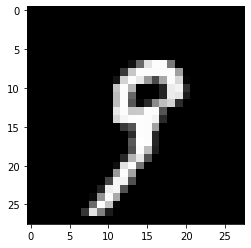

In [27]:
sample_img = train_data[19][0]
print(sample_img.shape)
imshow(sample_img[:,:,0].asnumpy(), cmap = "gray")

- `ImageFolderDataset` for loading image files stored in a folder. Syntax:
`image_dataset = gluon.data.vision.datasets.ImageFolderDataset('PATH')`

- Custom Dataset: custom handling for our own data

In [28]:
class CustomDataset(gluon.data.Dataset):
    def __init__(self, dict_data):
        self.dict_data = dict_data
        self.dict_keys = list(dict_data.keys())
        
    def __getitem__(self, idx):
        return self.dict_data[self.dict_keys[idx]]
    
    def __len__(self):
        return len(self.dict_data)

In [29]:
custom_data = CustomDataset({'a': mx.nd.array(1,),
                             'b': mx.nd.array(2,)})

custom_data[1]


2.0
<NDArray  @cpu(0)>

### Gluon Transformations

Data preprocessing and transformation used to make training more robust.

In [30]:
import mxnet as mx
from mxnet import gluon, nd

In [31]:
def scaling(data, label):
    data = data.astype('float32')/255
    return data, label

train_data = gluon.data.vision.datasets.MNIST(train = True).transform(scaling)
test_data = gluon.data.vision.datasets.MNIST(train = False).transform(scaling)

In [32]:
sample_img = train_data[19][0]
nd.min(sample_img).asscalar(), nd.max(sample_img).asscalar()

(0.0, 1.0)

`gluon.data.vision.transforms` has implemented common computer vision transformations.

In [33]:
from mxnet.gluon.data.vision import transforms

1. `ToTensor`:
    - `uint8` to `float32`
    - HWC to CHW
    - scaling to range [0, 1)

In [34]:
# BEFORE
sample_img = train_data[19][0]
print(sample_img.shape)
print(nd.min(sample_img).asscalar(), nd.max(sample_img).asscalar())

(28, 28, 1)
0.0 1.0


In [35]:
# APPLY TRANSFORMATION
to_tensor = transforms.ToTensor()
train_data = train_data.transform_first(to_tensor)
# .transform_first only apply to image, not the label

In [36]:
# AFTER
sample_img = train_data[19][0]
print(sample_img.shape)
print(nd.min(sample_img).asscalar(), nd.max(sample_img).asscalar())

(1, 28, 28)
0.0 0.003921569


2. `Normalize`: normalize Tensor with mean and standard deviation.

In [37]:
normalize = transforms.Normalize(mean = (0.1307,), std = (0.3081,))
train_data = train_data.transform_first(normalize)

3. `Compose`: apply transformation sequentially

In [38]:
transform_fn = transforms.Compose([to_tensor,
                                   normalize])
train_data = train_data.transform_first(transform_fn)

Data Augmentation:
- `transforms.Resize`
- `transforms.CenterCrop`
- `transforms.RandomResizedCrop`
- `transforms.RandomFlipLeftRight`
- `transforms.RandomBrightness`
- etc...

### Gluon DataLoaders

Dataloader is an iterator through entire dataset, creating mini batches until all samples have been used during training, signaling the end of one epoch.

In [39]:
import mxnet as mx
from mxnet import gluon, nd
from matplotlib.pyplot import imshow
%matplotlib inline

In [40]:
# generate random dataset
mx.random.seed(123)
X = mx.random.uniform(shape = (10, 3))
y = mx.random.uniform(shape = (10, 1))
dataset = gluon.data.dataset.ArrayDataset(X, y)

In [41]:
data_loader = gluon.data.DataLoader(dataset, batch_size = 4, last_batch = 'keep')

for batch_num, (X_batch, y_batch) in enumerate(data_loader):
    print(f"Batch number: {batch_num}")
    print(f"X_batch shape: {X_batch.shape}")
    print(f"y_batch shape: {y_batch.shape}")
    print("--------------------")

Batch number: 0
X_batch shape: (4, 3)
y_batch shape: (4, 1)
--------------------
Batch number: 1
X_batch shape: (4, 3)
y_batch shape: (4, 1)
--------------------
Batch number: 2
X_batch shape: (2, 3)
y_batch shape: (2, 1)
--------------------


**Parallel data loading** using CPU

In [42]:
from multiprocessing import cpu_count

data_loader = gluon.data.DataLoader(dataset, batch_size = 4, num_workers = cpu_count())

for batch_num, (X_batch, y_batch) in enumerate(data_loader):
    print(f"Batch number: {batch_num}")
    print(f"X_batch shape: {X_batch.shape}")
    print(f"y_batch shape: {y_batch.shape}")
    print("--------------------")

Batch number: 0
X_batch shape: (4, 3)
y_batch shape: (4, 1)
--------------------
Batch number: 1
X_batch shape: (4, 3)
y_batch shape: (4, 1)
--------------------
Batch number: 2
X_batch shape: (2, 3)
y_batch shape: (2, 1)
--------------------


**Lazy Transformations**: apply transformation and shuffle the data

In [43]:
from mxnet.gluon.data.vision import transforms

train_dataset = gluon.data.vision.datasets.MNIST(train = True)
transform = transforms.Compose([transforms.RandomFlipTopBottom(),
                               transforms.RandomFlipLeftRight()])

train_dataloader = gluon.data.DataLoader(train_dataset.transform_first(transform),
                                        batch_size = 5, shuffle = True)

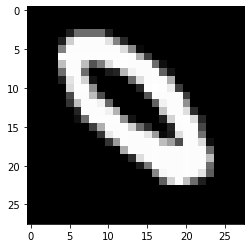

In [44]:
img, label = next(iter(train_dataloader))
imshow(img[0,:,:,0].asnumpy(), cmap = "gray")

## Neural Network Training & Evaluation

In [45]:
from mxnet import nd, gluon, init, autograd, metric

from mxnet.gluon import nn
from mxnet.gluon.data.vision import datasets, transforms

import matplotlib.pyplot as plt
from time import time

### Training

1. Get FashionMNIST data

In [46]:
mnist_train = datasets.FashionMNIST(train = True)
X, y = mnist_train[0]
print(f"Shape: {X.shape}")
print(f"Dtype: {X.dtype}")
print(f"No. of images: {len(mnist_train)}")

Shape: (28, 28, 1)
Dtype: <class 'numpy.uint8'>
No. of images: 60000


2. Visualize data

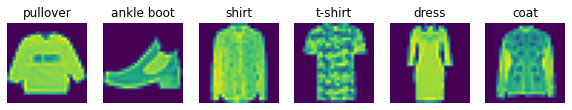

In [47]:
X, y = mnist_train[0:6]
class_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

fig, axes = plt.subplots(1, 6, figsize = (10, 5))
for ax, image, label in zip(axes.flat, X, y):
    ax.imshow(image.squeeze().asnumpy())
    ax.set_title(class_labels[label])
    ax.axis("off")

3. Transform dataset:
    - to float32
    - channel first
    - normalize

In [48]:
transformer = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.13, 0.31)
])

mnist_train = mnist_train.transform_first(transformer)

4. Data loading using dataloader

In [49]:
BATCH_SIZE = 256
train_data = gluon.data.DataLoader(mnist_train,
                                   batch_size = BATCH_SIZE,
                                   shuffle = True)

for data, label in train_data:
    print(data.shape)
    print(label.shape)
    break

(256, 1, 28, 28)
(256,)


5. Define the model:
    - LeNet architecture
    - Xavier initializer

In [50]:
net = nn.Sequential()
with net.name_scope():
    net.add(
        nn.Conv2D(channels = 6, kernel_size = 5, activation = 'relu'),
        nn.MaxPool2D(pool_size = 2, strides = 2),
        nn.Conv2D(channels = 16, kernel_size = 3, activation = 'relu'),
        nn.MaxPool2D(pool_size = 2, strides = 2),
        nn.Flatten(),
        nn.Dense(units = 120, activation = 'relu'),
        nn.Dense(units = 84, activation = 'relu'),
        nn.Dense(units = 10)
    )
net

Sequential(
  (0): Conv2D(None -> 6, kernel_size=(5, 5), stride=(1, 1), Activation(relu))
  (1): MaxPool2D(size=(2, 2), stride=(2, 2), padding=(0, 0), ceil_mode=False, global_pool=False, pool_type=max, layout=NCHW)
  (2): Conv2D(None -> 16, kernel_size=(3, 3), stride=(1, 1), Activation(relu))
  (3): MaxPool2D(size=(2, 2), stride=(2, 2), padding=(0, 0), ceil_mode=False, global_pool=False, pool_type=max, layout=NCHW)
  (4): Flatten
  (5): Dense(None -> 120, Activation(relu))
  (6): Dense(None -> 84, Activation(relu))
  (7): Dense(None -> 10, linear)
)

In [51]:
net.initialize(init = init.Xavier())

6. Define loss and metric
    - Loss function: Cross Entropy (for classification)
    - Metric: Accuracy

In [52]:
loss_fn = gluon.loss.SoftmaxCrossEntropyLoss()
train_acc = metric.Accuracy()

7. Define trainer (optimizer): Stochastic Gradient Descent

In [53]:
trainer = gluon.Trainer(net.collect_params(),
                        optimizer = "sgd",
                        optimizer_params = {"learning_rate": 0.1})

8. Training loop

In [54]:
for epoch in range(10):
    train_loss = 0.0
    start = time()
    
    for data, label in train_data:
        # forward pass
        with autograd.record():
            output = net(data)
            loss = loss_fn(output, label)
            
        # backward pass, compute gradient
        loss.backward()
        
        # optimizer, update weight
        trainer.step(BATCH_SIZE)
        
        # loss and metric
        train_loss += loss.mean().asscalar()
        train_acc.update(label, output)
        
    # print report
    print(f"Epoch-{epoch} => \
            Loss: {train_loss/len(train_data):.3f} \
            Accuracy: {train_acc.get()[1]:.3f} \
            Speed: {len(mnist_train)/(time() - start):.3f} image/sec")

Epoch-0 =>             Loss: 0.779             Accuracy: 0.714             Speed: 2650.196 image/sec
Epoch-1 =>             Loss: 0.470             Accuracy: 0.768             Speed: 2684.615 image/sec
Epoch-2 =>             Loss: 0.409             Accuracy: 0.795             Speed: 2762.732 image/sec
Epoch-3 =>             Loss: 0.375             Accuracy: 0.812             Speed: 2374.978 image/sec
Epoch-4 =>             Loss: 0.346             Accuracy: 0.824             Speed: 2771.865 image/sec
Epoch-5 =>             Loss: 0.330             Accuracy: 0.832             Speed: 2728.989 image/sec
Epoch-6 =>             Loss: 0.314             Accuracy: 0.840             Speed: 2600.859 image/sec
Epoch-7 =>             Loss: 0.302             Accuracy: 0.846             Speed: 2856.631 image/sec
Epoch-8 =>             Loss: 0.291             Accuracy: 0.851             Speed: 2769.951 image/sec
Epoch-9 =>             Loss: 0.283             Accuracy: 0.855             Speed: 2851.476 

9. Save trained model

In [55]:
net.save_parameters("scripts/trained_net.params")

### Evaluation

1. Re-build the model

In [56]:
net = nn.Sequential()
with net.name_scope():
    net.add(
        nn.Conv2D(channels = 6, kernel_size = 5, activation = 'relu'),
        nn.MaxPool2D(pool_size = 2, strides = 2),
        nn.Conv2D(channels = 16, kernel_size = 3, activation = 'relu'),
        nn.MaxPool2D(pool_size = 2, strides = 2),
        nn.Flatten(),
        nn.Dense(units = 120, activation = 'relu'),
        nn.Dense(units = 84, activation = 'relu'),
        nn.Dense(units = 10)
    )


2. Load the pre-trained parameters

In [57]:
net.load_parameters("scripts/trained_net.params")

3. Load validation dataset

In [58]:
mnist_validation = datasets.FashionMNIST(train = False)

4. Transformation

In [59]:
transform_fn = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.13, 0.31)
])

5. Prediction

In [60]:
preds = []
for idx in range(6):
    image, label = mnist_validation[idx]
    image = transform_fn(image).expand_dims(axis = 0)
    pred = net(image).argmax(axis = 1)
    preds.append(pred.astype('int32').asscalar())

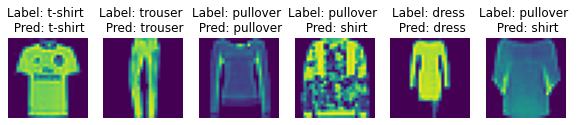

In [61]:
images, labels = mnist_validation[0:6]

class_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

fig, axes = plt.subplots(1, 6, figsize = (10, 5))
for ax, image, label, pred in zip(axes.flat, images, labels, preds):
    ax.imshow(image.squeeze().asnumpy())
    ax.set_title(f"Label: {class_labels[label]} \n Pred: {class_labels[pred]}")
    ax.axis("off")

6. Validation DataLoader

In [62]:
BATCH_SIZE = 256
validation_data = gluon.data.DataLoader(mnist_validation.transform_first(transform_fn),
                                        batch_size = BATCH_SIZE)

7. Define metric

In [63]:
validation_acc = metric.Accuracy()

8. Validation loop

In [64]:
for data, label in validation_data:
    output = net(data)
    validation_acc.update(label, output)
print(f"Validation Accuracy: {validation_acc.get()[1]:.3f}")

Validation Accuracy: 0.890


## Summary

1. Neural network training:
    - Forward pass: get the predicted value
    - Backward pass: automatic differentiation, compute gradient to move parameters towards local minima
    - Optimized: updating model parameters using the computed gradients. Done with Gluon Trainer, example of optimizer: Stochastic Gradient Descent
    
2. Dataset vs Dataloader

    - Computer vision datasets: MNIST, CIFAR-10
    - Dataloader: asynchronously generate mini batches of data
    - Dataset can be transformed to resize, format, and even perform data augmentation
    
```
train_dataloader = gluon.data.DataLoader(mnist_train.transform_first(transform),
                                         batch_size = batch_size,
                                         shuffle = True,
                                         num_workers = 4)
```
    
3. Training loop

```
for data, label in train_dataloader:
    with autograd.record():
        output = model(data)
        loss = loss_fn(output, label)
    loss.backward()
    trainer.step()
```

- Iterates over batches of data for multiple epochs
- Predict output for current batch
- Compute loss between predicted and label in autograd scope
- Backward pass to compute gradients
- Take trainer step to update parameters according to optimizer rules
- Repeat until converges
   